### NETWORKX SIMPLEX ###
* Source nodes with their transmission capacities 
* Receiver nodes with their order requirements (zero-sum). 
* We are looking for the flow configuration from sources to recipients that meets the  
  requirements at a minimized price level.

In [1]:
# INIT
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import random as rnd
%matplotlib inline   
import warnings   
warnings.filterwarnings("ignore", category=UserWarning)

                       Capacity | unit price


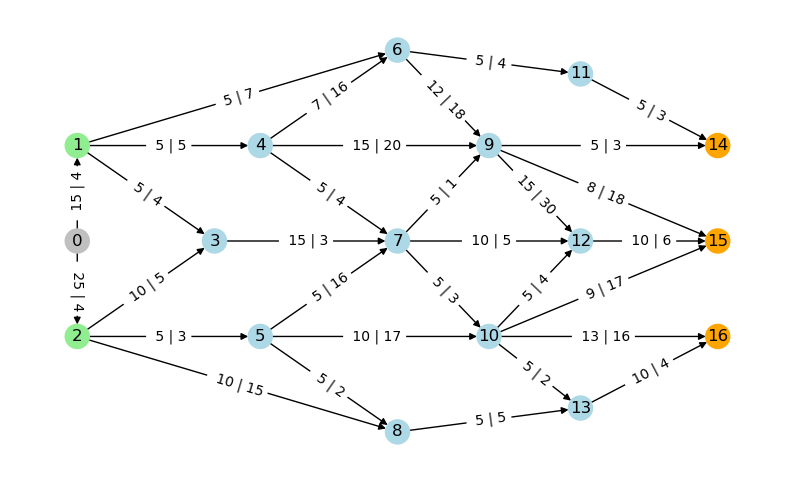

Make the orders for terminal nodes 14, 15 ja 16.
The order for node 14 (max 10):  8
The order for node 15 (max 27):  12
The order for node 16 (max 23):  10


In [2]:
# CREATE A NETWORK
plt.rcParams["figure.figsize"] = [10, 6]    
G = nx.DiGraph()

# Nodes:
G.add_nodes_from([
     (0, {"color":      "silver", "demand": 0}),
     (1, {"color":"lightgreen", "demand": 0}),
     (2, {"color":"lightgreen", "demand": 0}),
     (3, {"color": "lightblue", "demand": 0}),
     (4, {"color": "lightblue", "demand": 0}), 
     (5, {"color": "lightblue", "demand": 0}), 
     (6, {"color": "lightblue", "demand": 0}),
     (7, {"color": "lightblue", "demand": 0}),
     (8, {"color": "lightblue", "demand": 0}),
     (9, {"color": "lightblue", "demand": 0}),
     (10,{"color": "lightblue", "demand": 0}),
     (11,{"color": "lightblue", "demand": 0}),
     (12,{"color": "lightblue", "demand": 0}),
     (13,{"color": "lightblue", "demand": 0}),
     (14,{"color":    "orange", "demand":10}),
     (15,{"color":    "orange", "demand":10}),
     (16,{"color":    "orange", "demand":10}),
     ])
# Node positions
ps = {0:(0, 0),   1:(0, 0.4),   2:(0,-0.4),  3:(3, 0),  4:(4, 0.4), 
      5:(4,-0.4,),  6:(7, 0.8),  7:(7, 0),  8:(7,-0.8), 9:(9,0.4 ),
     10:(9,-0.4 ), 11:(11, 0.7), 12:(11,0 ), 13:(11,-0.7 ),
     14:(14,0.4 ), 15:(14,0 ),  16:(14,-0.4 )}
# Collect the node colors into a list of dictionary values 'ncols' 
ncols = nx.get_node_attributes(G, 'color').values()  

# Edges
G.add_edges_from([
        (0, 1, {"capacity":15, "weight": 4, "color":'gray', "width": 1}),
        (0, 2, {"capacity":25, "weight": 4, "color":'gray', "width": 1}),
        (1, 3, {"capacity": 5, "weight": 4, "color":'r', "width": 1}),
        (1, 4, {"capacity": 5, "weight": 5, "color":'k', "width": 1}),
        (1, 6, {"capacity": 5, "weight": 7, "color":'k', "width": 1}),
        (2, 3, {"capacity":10, "weight": 5, "color":'k', "width": 1}),
        (2, 5, {"capacity": 5, "weight": 3, "color":'k', "width": 1}),
        (2, 8, {"capacity":10, "weight":15, "color":'k', "width": 1}),
        (3, 7, {"capacity":15, "weight": 3, "color":'k', "width": 1}),
        (4, 6, {"capacity": 7, "weight":16, "color":'k', "width": 1}),
        (4, 7, {"capacity": 5, "weight": 4, "color":'k', "width": 1}),
        (4, 9, {"capacity":15, "weight":20, "color":'k', "width": 1}),
        (5, 7, {"capacity": 5, "weight":16, "color":'k', "width": 1}),
        (5, 8, {"capacity": 5, "weight": 2, "color":'k', "width": 1}),
        (5,10, {"capacity":10, "weight":17, "color":'k', "width": 1}),
        (6, 9, {"capacity":12, "weight":18, "color":'k', "width": 1}),
        (6,11, {"capacity": 5, "weight": 4, "color":'k', "width": 1}),
        (7, 9, {"capacity": 5, "weight": 1, "color":'k', "width": 1}),
        (7,10, {"capacity": 5, "weight": 3, "color":'k', "width": 1}),
        (7,12, {"capacity":10, "weight": 5, "color":'k', "width": 1}),
        (8,13, {"capacity": 5, "weight": 5, "color":'k', "width": 1}),
        (9,12, {"capacity":15, "weight":30, "color":'k', "width": 1}),
        (9,14, {"capacity": 5, "weight": 3, "color":'k', "width": 1}),
        (9,15, {"capacity": 8, "weight":18, "color":'k', "width": 1}),
        (10,12,{"capacity": 5, "weight": 4, "color":'k', "width": 1}),
        (10,13,{"capacity": 5, "weight": 2, "color":'k', "width": 1}),
        (10,15,{"capacity": 9, "weight":17, "color":'k', "width": 1 }),
        (10,16,{"capacity":13, "weight":16, "color":'k', "width": 1 }),
        (11,14,{"capacity": 5, "weight": 3, "color":'k', "width": 1 }),
        (12,15,{"capacity":10, "weight": 6, "color":'k', "width": 1 }),
        (13,16,{"capacity":10, "weight": 4, "color":'k', "width": 1 }),
    ])
# Edge attributes into dictionaries:
edge_capacity = nx.get_edge_attributes(G,'capacity')
edge_weight = nx.get_edge_attributes(G,'weight')       # Unit prices  of transport
ecols = nx.get_edge_attributes(G, 'color').values()
widths = nx.get_edge_attributes(G, 'width').values()


# DRAW THE NETWORK: capacity and unit price of pipes on the same label
print('                       Capacity | unit price'      )
nx.draw_networkx(G,
        pos=ps,                        # Node positions
        node_color=ncols,   
        font_color= 'k',               # For nodes
        with_labels=True,)

# Edgelabels into the dictionary 'elabs', where the key is edge and..
# as its value is 'capacity|unit price':
elabs = (dict([((u,v), f' {edge_capacity[u,v]} | {edge_weight[u,v]}') \
                          for u,v in G.edges]))
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = elabs)   # Draw edge labels 

plt.axis("off")           # Ei piirrä ympärille raameja                               
plt.show()

# Make the orders for terminal nodes 14, 15 and 16
print("Make the orders for terminal nodes 14, 15 ja 16.")
d14 = int(input("The order for node 14 (max 10):  "))
G.nodes[14]["demand"] = d14         
d15 = int(input("The order for node 15 (max 27):  "))
G.nodes[15]["demand"] = d15
d16 = int(input("The order for node 16 (max 23):  "))
G.nodes[16]["demand"] = d16
G.nodes[0]["demand"]  = -(d14+d15+d16)

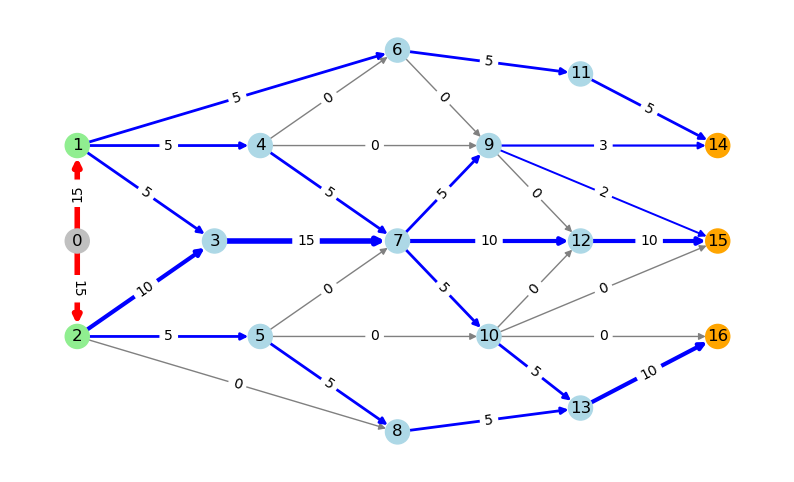

              Flows in pipelines, cost = 625


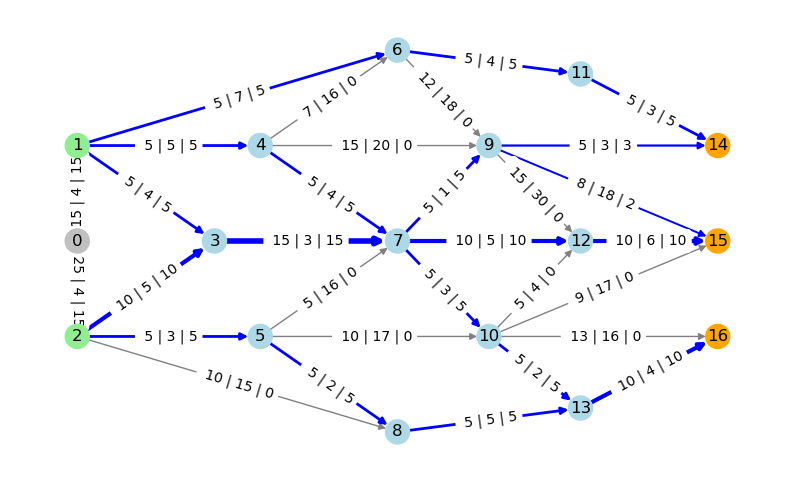

        Capacity|Unit price|Solution flow,  cost = 625


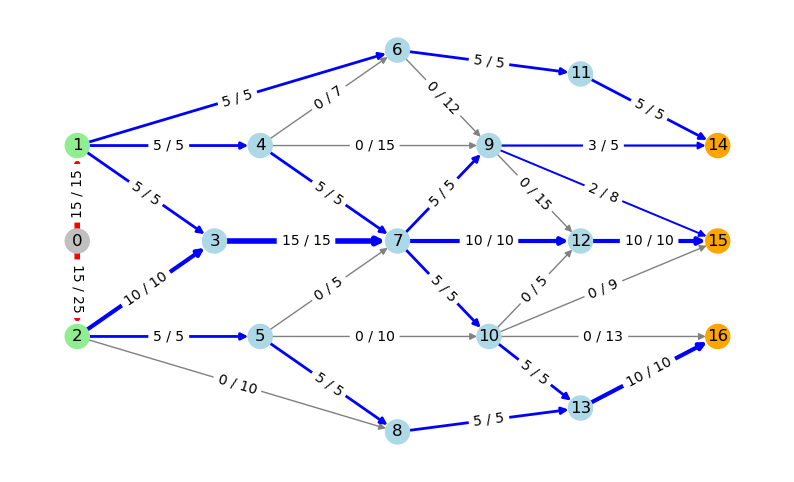

           Flow|Capacity

           Total price: 625 €,  20.83 €/unit



In [3]:
# SIMPLEX SOLUTION: Cost-minimized flow configuration that meets the requirements
flowCost, flowDict = nx.network_simplex(G, demand="demand")    

# UPDATE THE EDGELABELS to correspond to the solution flow.
# Prepare a dictionary for the pipe flows:
edge_flow = {}
for e in G.edges:
    edge_flow[e]=0
# Updating the values of the 'edge_flow' dictionary with the calculated flows...
# from the output dictionary 'flowDict'  of calculation function (has a different format)
for (u, v) in edge_flow:
    edge_flow[(u, v)]=flowDict[u][v]  
    

# COLOR the pipes with flow in blue:
for u, v in edge_capacity:
    if edge_flow[u,v] == 0:
        G.edges[(u,v)]['color']= 'gray'
    else: 
        G.edges[(u,v)]['color']= 'blue'        
G.edges[(0,1)]['color']= 'r'              # Delivery order from 'headquarters' to warehouse 1
G.edges[(0,2)]['color']= 'r'              # Delivery order from 'headquarters' to warehouse 2
# Updating the color list for output       
ecols = nx.get_edge_attributes(G, 'color').values()

 
# THICKENING THE EDGES to match the flow
for u, v in edge_capacity:   # TAI G.edges: 
    G.edges[(u,v)]['width']= 1+edge_flow[(u, v)]/5
widths = nx.get_edge_attributes(G, 'width').values()


# OUTPUT 1/3: only flows in the labels 
plt.rcParams["figure.figsize"] = [10, 6]    
    
nx.draw_networkx(G,
        pos=ps,                 
        node_color=ncols,       
        font_color= 'k',                   # For nodes
        edge_color=ecols,     
        width= list(widths),               # Edge thickness according to capacity
        with_labels=True,) 

nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = edge_flow,)   # Draw edge labels

plt.axis("off")                            # No frames                                
plt.show()
print('              Flows in pipelines, cost =', flowCost)


# Output 2/3: capacities, pipe unit prices and solution flow
nx.draw_networkx(G,
        pos=ps,
        node_color=ncols,
        font_color= 'k',
        edge_color=ecols,
        width= list(widths),                # Edge thickness according to capacity
        with_labels=True,) 

# Edgelabels into the dictionary 'elabs', where the key is edge and..
# as its value is 'capacity|unit price|solution flow':
elabs = dict([((u,v), 
        f' {edge_capacity[u,v]} | {edge_weight[u,v]} | {edge_flow[u,v]}') 
        for u,v in G.edges])

nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = elabs)     # Draw edgelabels

plt.axis("off")                                          
plt.show()
print('        Capacity|Unit price|Solution flow,  cost =', flowCost)

# OUTPUT 3/3: flow and capacity
nx.draw_networkx(G,
        pos=ps,
        node_color=ncols,
        font_color= 'k',
        edge_color=ecols,
        width= list(widths),                  # Edge thickness according to capacity
        with_labels=True,) 

# Edge labels 'flow|capacity'
elabs = (dict([((u,v), f'{edge_flow[u,v]} / {edge_capacity[u,v]}')\
                          for u,v in edge_flow])) 
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = elabs)   # Draw edgelabels
plt.axis("off")                                  
plt.show()
print('           Flow|Capacity' )

# COUNT THE PRICES
yks_hinta = "{:.2f}".format(flowCost/(d14+d15+d16))
print()
print('           Total price:', flowCost, '€, ', yks_hinta, '€/unit')
print()